<a href="https://colab.research.google.com/github/Tiamiyu1/Health-Insurance-Analysis/blob/main/Health_Insurance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Health Insurance Analysis

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

## Read data

In [ ]:
path ='https://raw.githubusercontent.com/Tiamiyu1/Health-Insurance-Analysis/main/insurance.csv'
insurance = pd.read_csv(path)
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


## Data Description

## Data Dictionary
### Data Source: US Health Insurance Dataset
### Insurance Premium Charges in US with important details for risk underwriting.

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,

- objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

## Problem Statement
Analyze the data to derive important insights

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* The data has 1338 entries with 7 attributes. 2 integer type, 2 float type and 3 object type(Strings in the column)

* There is no null value in any of the columns

In [ ]:
insurance.describe().T # Transpose t

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* The data statistics generally looks perfects 

* The data in the age column represents true age distribution of the adult population

* The charged amount is higly skewed as most people would require basic medical care and only few suffer from diseases which cost more to get rid of

In [ ]:
insurance.shape

(1338, 7)

- The data had 1338 rows and 7 columns

## Data Cleaning

In [ ]:
insurance.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [ ]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- There is no missing value in the data

In [ ]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

- The columns are in the right data types
- The variable names are well written and convey actual meanings

In [ ]:
# insurance['charges'] = insurance.charges.round(decimals=2)

## Clinical relevance of BMI

- BMI is an indicator of total body fat in many individuals. Thus it is considered as an indicator of health risk.

- BMI is used by healthcare professionals to screen for overweight and obese individuals. The BMI is used to assess a person’s health risks associated with obesity and overweight.

- The formula is - BMI = (Weight in kilograms) divided by (Height in metres squared)

- A normal BMI score is one that falls between 18.5 and 24.9. This indicates that a person is within the normal weight range for his or her height. 

- For example those with a high BMI are at risk of:-

  - high blood cholesterol or other lipid disorders

  - type 2 diabetes

  - heart disease

  - stroke

  - high blood pressure
  
  - sleep apnea and snoring





### Body Mass Index (BMI)	Weight Status

- Below 18.5	----> Underweight

- 18.5 - 24.9 ----> Normal

- 25.0 - 29.9 ----> Overweight

- 30.0 ----> plus	Obese

## Feature Engineering

In [ ]:
weight = []
for i in insurance['bmi']:
  if i < 18.5:
    weight.append('Underweight')
  elif (i >= 18.5) & (i <= 24.9):
    weight.append('Normal')
  elif( i >= 25.0) & (i <= 29.9):
    weight.append('Overweight')
  else:
   weight.append('Obessed') 

insurance['weight_status'] = weight

normal = []
for i in insurance['weight_status']:
  if i == 'Normal':
    normal.append('Yes')
  else:
    normal.append("No")
insurance['normal_weight'] = normal

- Based on the clinical importance of bmi, we generated two new columns **weight_status** to show the 4 possible weight status and **normal**, a binary which tells if an individual weight is normal or not

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,weight_status,normal_weight
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,No
1,18,male,33.770,1,no,southeast,1725.55230,Obessed,No
2,28,male,33.000,3,no,southeast,4449.46200,Obessed,No
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Yes
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,No


## Data Exploration and Visualization

### Univariate Analysis

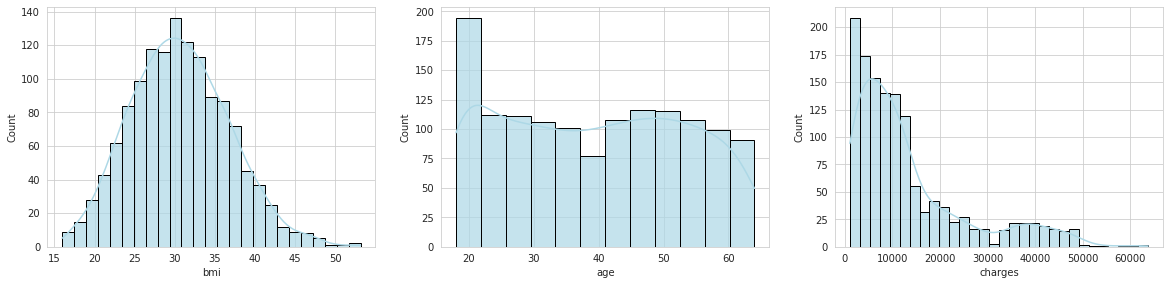

In [ ]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.histplot(insurance.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7, kde=True)
plt.xlabel('bmi')

plt.subplot(3,3,2)
sns.histplot(insurance.age, color='lightblue', edgecolor = 'black', alpha = 0.7, kde=True)
plt.xlabel('age')

plt.subplot(3,3,3)
sns.histplot(insurance.charges, color='lightblue', edgecolor = 'black', alpha = 0.7, kde=True)
plt.xlabel('charges');

- bmi is normally distributed 
- Age looks like assumes a uniform distribution with hadrly no skewness
- Claimed amounts are rightly skewed (positive skewness)

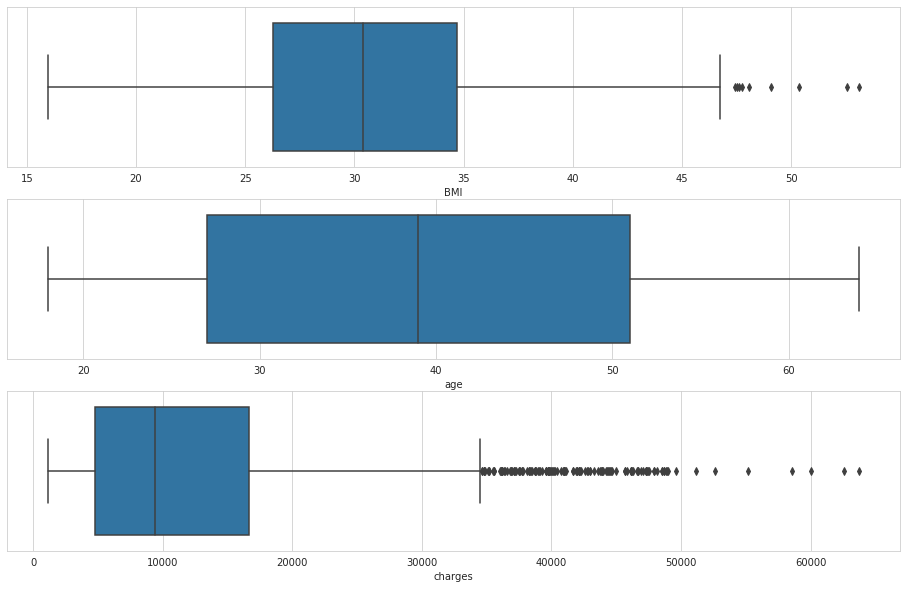

In [ ]:
plt.figure(figsize= (16,10))
plt.subplot(3,1,1)
sns.boxplot(x= insurance.bmi)
plt.xlabel('BMI')

plt.subplot(3,1,2)
sns.boxplot(x= insurance.age, )

plt.subplot(3,1,3)
sns.boxplot(x= insurance.charges,);

- bmi has a few extreme values
- age has no extreme value
- charges as it is highly skewed, there are quite a lot of extreme values

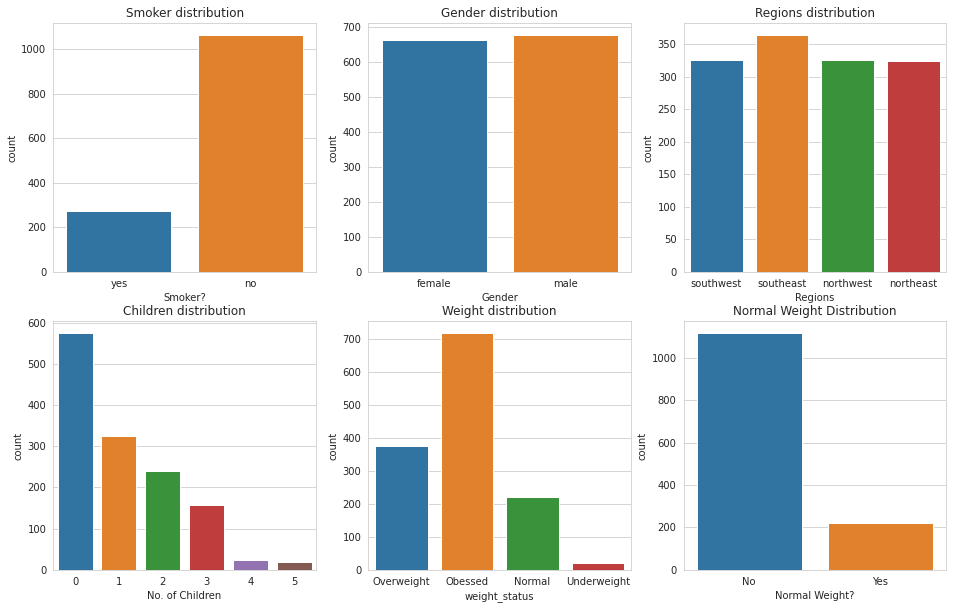

In [ ]:
plt.figure(figsize=(16,32))

plt.subplot(6,3,1)
sns.countplot('smoker', data=insurance)
plt.xlabel('Smoker?')
plt.title("Smoker distribution")

plt.subplot(6,3,2)
sns.countplot('sex', data=insurance)
plt.xlabel('Gender')
plt.title("Gender distribution")

plt.subplot(6,3,3)
sns.countplot('region', data=insurance)
plt.xlabel('Regions')
plt.title("Regions distribution")

plt.subplot(6,3,4)
sns.countplot('children', data=insurance)
plt.xlabel('No. of Children')
plt.title("Children distribution");

plt.subplot(6,3, 5)
sns.countplot('weight_status', data=insurance)
plt.xlabel('weight_status')
plt.title("Weight distribution");

plt.subplot(6,3, 6)
sns.countplot('normal_weight', data=insurance)
plt.xlabel('Normal Weight?')
plt.title("Normal Weight Distribution");

- There are lot many non-smokers than smokers in the data
- Instances are evenly distributed accross all four regions
- We have as many males as females
- Most instances have less than 2 children and very few have 4 or 5 children
- Obessed individual are the most, followed by overweight the normal
- Vast majority of the observations do not have normal weight (based on bmi)

In [ ]:
print('Value count for smoker', '\n', insurance.smoker.value_counts())


print('*' *50) 


print('Value count for Normal Weight', '\n', insurance.normal_weight.value_counts())


Value count for smoker 
 no     1064
yes     274
Name: smoker, dtype: int64
**************************************************
Value count for Normal Weight 
 No     1116
Yes     222
Name: normal_weight, dtype: int64


### Bivariate/multivariate Analysis

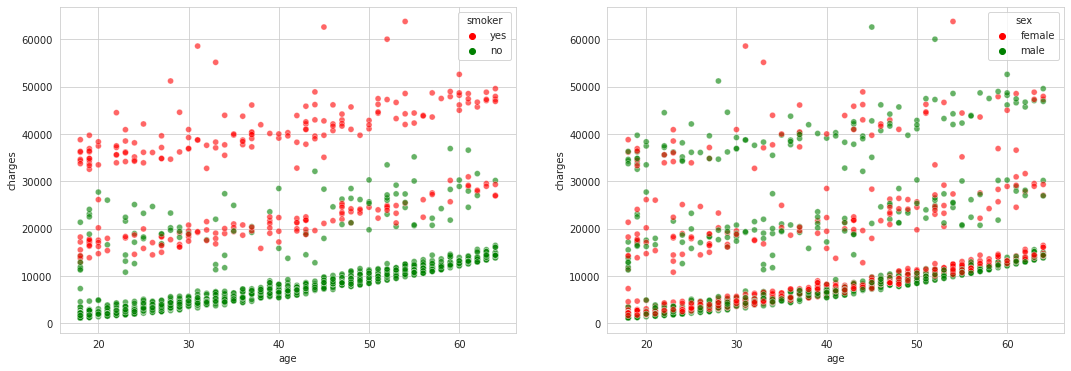

In [ ]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(insurance.age, insurance.charges,hue=insurance.smoker,palette= ['red','green'] ,alpha=0.6)

plt.subplot(1,2,2)
sns.scatterplot(insurance.age, insurance.charges,hue=insurance.sex,palette= ['red','green'] ,alpha=0.6);

- Apparently, non smokers claimed amount seems lesser than that of the smokers
- Obviously, both genders seem to claim even amount across the age distribution

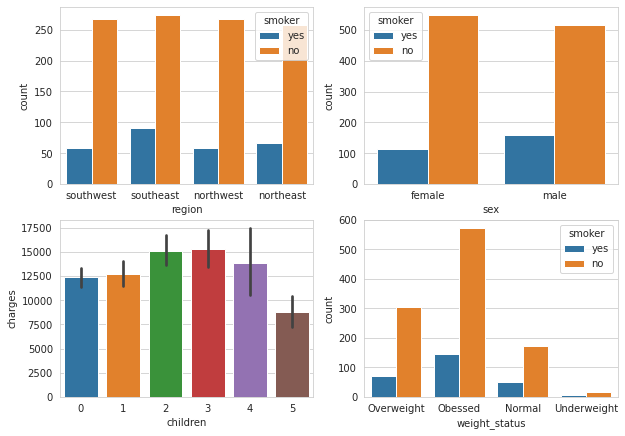

In [ ]:
plt.figure(figsize=(10,15))

plt.subplot(4,2,1)
sns.countplot('region',hue='smoker', data=insurance)

plt.subplot(4,2,2)
sns.countplot('sex',hue='smoker', data=insurance)

plt.subplot(4,2,3)
sns.barplot('children', 'charges', data=insurance)

plt.subplot(4,2,4)
sns.countplot('weight_status', hue='smoker', data=insurance)

- Smoking habits of people of different regions are similar
- There are many more male smokers than female
- Individual with 2/3 children claimed more amount than others
- Obessed individuals smoke more, followed by overweight


In [ ]:
# Create a function that returns a Pie chart for categorical variable:
def pie_chart(x = 'smoker'):
    """
    Function creates a Pie chart for categorical variables.
    """
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    s = insurance.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax.legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax.set_title(f'{x.capitalize()} Piechart')

In [ ]:
# # plt.figure(figsize=(10,15))

# pie_chart('sex')

# pie_chart('region')


# pie_chart('weight_status')


# pie_chart('normal_weight');

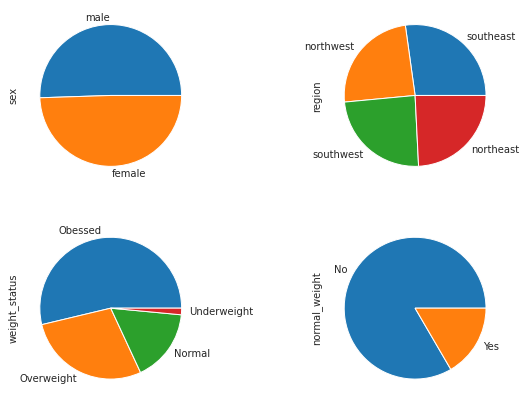

In [ ]:
plt.figure(figsize=(10,15))

plt.subplot(4,2,1)
insurance.sex.value_counts().plot(kind='pie' )

plt.subplot(4,2,2)
insurance.region.value_counts().plot(kind='pie')

plt.subplot(4,2,3)
insurance.weight_status.value_counts().plot(kind='pie' )

plt.subplot(4,2,4)
insurance.normal_weight.value_counts().plot(kind='pie');

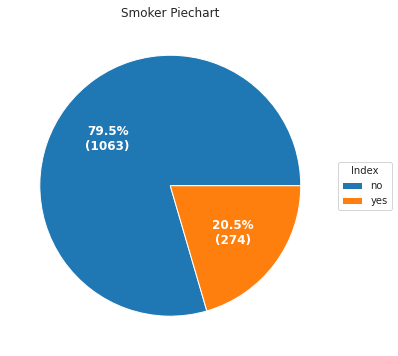

In [ ]:
pie_chart('smoker')

In [ ]:
insurance2= insurance.copy()

In [ ]:
insurance2.sex.replace({'male':1, 'female':0}, inplace=True)
insurance2.smoker.replace({'yes':1, 'no':0}, inplace=True)

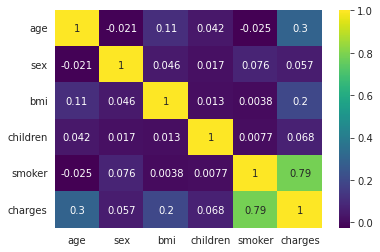

In [ ]:
sns.heatmap(insurance2.corr(), annot=True, cmap='viridis')

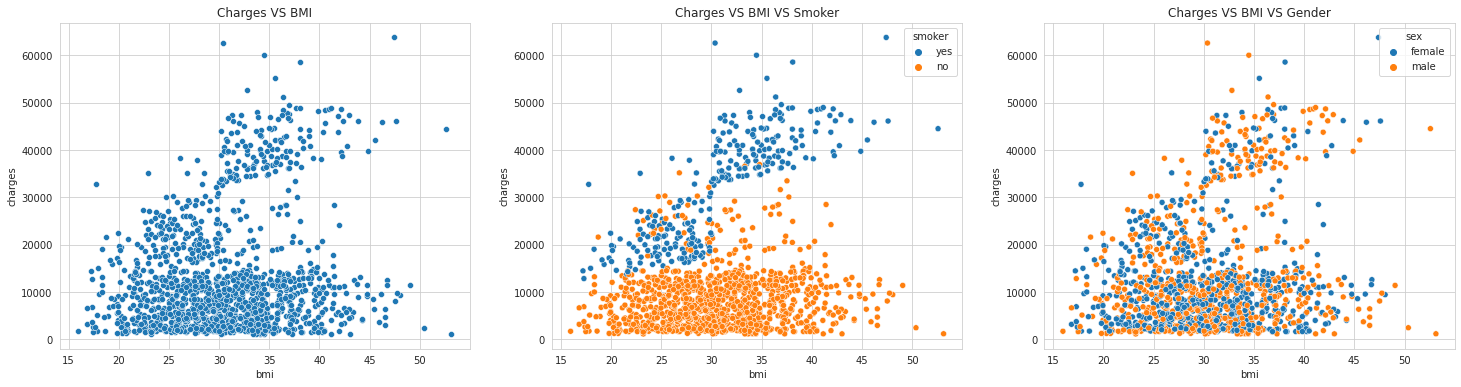

In [ ]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.scatterplot(y='charges', x='bmi', data=insurance)
plt.title('Charges VS BMI')

plt.subplot(1,3,2)
sns.scatterplot(y='charges', x='bmi', hue='smoker', data=insurance)
plt.title('Charges VS BMI VS Smoker')


plt.subplot(1,3,3)
sns.scatterplot(y='charges', x='bmi', hue='sex', data=insurance)
plt.title('Charges VS BMI VS Gender');

## Hypothesis Testing

In [ ]:
# get ANOVA table output

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('charges ~ C(smoker)', data=insurance).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(smoker),1.215199e+11,1.0,2177.614868,8.271436e-283
Residual,7.455432e+10,1336.0,NaN,NaN


In [ ]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(insurance[insurance.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(insurance[insurance.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array


import statsmodels.api as sm
import scipy.stats as stats
t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


- Statistically, smokers seem to claim significantly more money than non-smokers

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('bmi ~ children', data = insurance).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F   PR(>F)
children      8.093929     1.0  0.217522  0.64101
Residual  49712.106457  1336.0       NaN      NaN


- The distribution of BMI across individuals with no children, one child and two children are the same.

In [ ]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(insurance[insurance['children'] ==0]['charges'], insurance[insurance['children'] >=1]['charges'], equal_var=True)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: -2.3720611301669337
p_value: 0.017830174683565684


In [ ]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(insurance[insurance['sex']=='male']['charges'], insurance[insurance['sex']=='female']['charges'], equal_var=True)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: 2.097546590051688
p_value: 0.03613272100592976


In [ ]:
pd.pivot_table(insurance, values='charges', index='sex', columns='region', aggfunc='sum')

region,northeast,northwest,southeast,southwest
sex,,,,
female,2.085466e+06,2.046699e+06,2.362442e+06,1.826455e+06
male,2.258203e+06,1.989013e+06,3.001248e+06,2.186300e+06


In [ ]:
pd.pivot_table(insurance, values='charges', index='children',columns='sex', aggfunc='sum')

sex,female,male
children,,
0,3.440751e+06,3.657319e+06
1,1.921495e+06,2.203405e+06
2,1.659017e+06,1.958639e+06
3,1.067652e+06,1.343133e+06
4,1.533144e+05,1.929520e+05
5,7.883205e+04,7.931658e+04


In [ ]:
pd.pivot_table(insurance, values='charges', index='smoker', aggfunc='sum')

,charges
smoker,
no,8.974061e+06
yes,8.781764e+06


In [ ]:
insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
insurance[insurance.charges==insurance.charges.max()]

,age,sex,bmi,children,smoker,region,charges,weight_status,normal_weight
543,54,female,47.41,0,yes,southeast,63770.42801,Obessed,No


In [ ]:
insurance[insurance.charges==insurance.charges.min()]

,age,sex,bmi,children,smoker,region,charges,weight_status,normal_weight
940,18,male,23.21,0,no,southeast,1121.8739,Normal,Yes


# Key Findings





- Smoking significantly influences the charged amounts: Smokers are charged more than non-smokers.
- The BMI is evenly distributed across males and females.
- The amount of male smokers is higher than female smokers.
- There is no difference in the amount charged for both genders.
- Smoking habits of people of different regions are similar.
- The BMI is directly positively correlated to the amounts charged. 

# Future Work
- Predictive Analysis to predict an individual charged amount
- Health campaign to sensitize people on the health risk factors associated with smoking and Obesity.
- Diets and Exercises that reduce weight should be recommended.


# Ikram Suggestion

- Normalize/Standardize bmi and charges because of high range(max-min) for ML 
- Fitting the data (histogram) to a particular probability law/rule for confirmation of the distribution (to test for normality)
- Anova testing for hypothesis(smoker/charges)